<a href="https://colab.research.google.com/github/fomitoyin/class1903we/blob/master/IoT_Lab_Work_AH_PM25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from math import sqrt
import numpy

In [11]:
ref_df = pd.read_csv('Calibration_Data.csv')
ref_df = ref_df.head(1891)
ref_df

,Datetime,Ref_PM10,Ref_PM25,Temp,RH,LCS_PM25,LCS_PM10
0,25/02/2021 00:00,3.351,2.837,9.643,86.879,3.850,4.250
1,25/02/2021 00:15,2.445,2.306,9.688,85.511,2.075,2.550
2,25/02/2021 00:30,2.390,2.040,9.722,84.519,2.400,2.700
3,25/02/2021 00:45,2.960,2.174,9.593,83.878,1.475,2.200
4,25/02/2021 01:00,3.102,2.672,9.601,83.289,2.150,3.400
...,...,...,...,...,...,...,...
1886,16/03/2021 15:30,5.063,2.060,15.055,62.895,0.850,3.725
1887,16/03/2021 15:45,4.676,2.149,15.141,63.736,1.400,2.850
1888,16/03/2021 16:00,5.615,2.210,14.993,65.365,0.850,3.050
1889,16/03/2021 16:15,6.470,2.078,14.787,66.249,0.700,0.700


In [12]:
ref_df.describe()

,Ref_PM10,Ref_PM25,Temp,RH,LCS_PM25,LCS_PM10
count,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000,1891.000000
mean,12.441210,9.676354,5.933822,80.526803,8.210225,19.324121
std,10.273003,9.481406,2.777020,11.791793,9.914433,26.324329
min,0.233000,0.196000,-0.043000,49.687000,0.100000,0.100000
25%,6.278000,3.543500,3.857000,71.555000,1.625000,5.712500
50%,9.577000,6.487000,5.522000,81.394000,3.800000,11.200000
75%,14.985000,11.945000,8.098000,91.164000,10.750000,19.500000
max,80.680000,54.150000,15.141000,100.000000,48.300000,165.575000


In [13]:
AH = []

for i, row  in ref_df.iterrows():
    
    result   = (6.112*(numpy.exp((17.67*row['Temp'])/(row['Temp']+243.5)))* row['RH']*2.1674)/(273.15 + row['Temp'])
    
    AH.append(result)

In [14]:
ref_df['AH'] = AH
ref_df

,Datetime,Ref_PM10,Ref_PM25,Temp,RH,LCS_PM25,LCS_PM10,AH
0,25/02/2021 00:00,3.351,2.837,9.643,86.879,3.850,4.250,7.978006
1,25/02/2021 00:15,2.445,2.306,9.688,85.511,2.075,2.550,7.874888
2,25/02/2021 00:30,2.390,2.040,9.722,84.519,2.400,2.700,7.800375
3,25/02/2021 00:45,2.960,2.174,9.593,83.878,1.475,2.200,7.677965
4,25/02/2021 01:00,3.102,2.672,9.601,83.289,2.150,3.400,7.627931
...,...,...,...,...,...,...,...,...
1886,16/03/2021 15:30,5.063,2.060,15.055,62.895,0.850,3.725,8.088604
1887,16/03/2021 15:45,4.676,2.149,15.141,63.736,1.400,2.850,8.239783
1888,16/03/2021 16:00,5.615,2.210,14.993,65.365,0.850,3.050,8.374574
1889,16/03/2021 16:15,6.470,2.078,14.787,66.249,0.700,0.700,8.381888


In [15]:
df1 = ref_df.drop(['Datetime','Ref_PM10','Ref_PM25','RH','LCS_PM10'] ,axis='columns')
df1

,Temp,LCS_PM25,AH
0,9.643,3.850,7.978006
1,9.688,2.075,7.874888
2,9.722,2.400,7.800375
3,9.593,1.475,7.677965
4,9.601,2.150,7.627931
...,...,...,...
1886,15.055,0.850,8.088604
1887,15.141,1.400,8.239783
1888,14.993,0.850,8.374574
1889,14.787,0.700,8.381888


In [19]:
y = ref_df.iloc[:, [2]] 
y

,Ref_PM25
0,2.837
1,2.306
2,2.040
3,2.174
4,2.672
...,...
1886,2.060
1887,2.149
1888,2.210
1889,2.078


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1323, 3) (1323, 1)
(568, 3) (568, 1)


In [21]:
# fit a model
#ŷref = b0 + b1*T + b2* PMraw + b3* AH
lm = linear_model.LinearRegression()

In [22]:
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [23]:
new_data = X_test

new_data

,Temp,LCS_PM25,AH
1371,8.502,1.400,7.659022
1838,9.286,9.300,8.137935
1570,4.251,0.500,5.790021
29,7.808,3.200,6.953921
1730,8.045,3.400,6.794944
...,...,...,...
356,10.371,14.075,6.493840
1660,5.197,0.775,5.562459
775,3.549,2.000,4.386721
200,3.080,13.250,5.534436


In [24]:
new_data['Predictions_PM25'] = predictions 
new_data['Reference_PM25'] = y_test
new_data


,Temp,LCS_PM25,AH,Predictions_PM25,Reference_PM25
1371,8.502,1.400,7.659022,1.287941,1.235
1838,9.286,9.300,8.137935,8.036722,1.937
1570,4.251,0.500,5.790021,1.508921,0.304
29,7.808,3.200,6.953921,3.973189,5.906
1730,8.045,3.400,6.794944,4.668356,5.078
...,...,...,...,...,...
356,10.371,14.075,6.493840,16.738133,20.990
1660,5.197,0.775,5.562459,2.922627,2.112
775,3.549,2.000,4.386721,5.426921,3.545
200,3.080,13.250,5.534436,12.907398,12.950


In [25]:
new_data.describe()

,Temp,LCS_PM25,AH,Predictions_PM25,Reference_PM25
count,568.000000,568.000000,568.000000,568.000000,568.000000
mean,5.912720,8.622711,5.845958,9.998744,10.074882
std,2.749354,10.474456,1.083090,9.086599,10.298529
min,0.036000,0.175000,3.530243,-0.185751,0.214000
25%,3.878500,1.550000,5.333944,4.195089,3.539750
50%,5.395000,3.950000,5.744780,6.592655,6.511500
75%,8.120750,11.168750,6.327255,12.157155,12.052500
max,15.141000,48.300000,9.548737,44.648740,53.760000


In [26]:
new_data.to_csv("Result_MLR_PM25.csv")

result_df_mul = pd.read_csv('Result_MLR_PM25.csv')
#ref_df = ref_df.head(1891)
result_df_mul

,Unnamed: 0,Temp,LCS_PM25,AH,Predictions_PM25,Reference_PM25
0,1371,8.502,1.400,7.659022,1.287941,1.235
1,1838,9.286,9.300,8.137935,8.036722,1.937
2,1570,4.251,0.500,5.790021,1.508921,0.304
3,29,7.808,3.200,6.953921,3.973189,5.906
4,1730,8.045,3.400,6.794944,4.668356,5.078
...,...,...,...,...,...,...
563,356,10.371,14.075,6.493840,16.738133,20.990
564,1660,5.197,0.775,5.562459,2.922627,2.112
565,775,3.549,2.000,4.386721,5.426921,3.545
566,200,3.080,13.250,5.534436,12.907398,12.950


In [27]:
result_df_mul = result_df_mul.iloc[:, [4, 5]] 
result_df_mul

,Predictions_PM25,Reference_PM25
0,1.287941,1.235
1,8.036722,1.937
2,1.508921,0.304
3,3.973189,5.906
4,4.668356,5.078
...,...,...
563,16.738133,20.990
564,2.922627,2.112
565,5.426921,3.545
566,12.907398,12.950


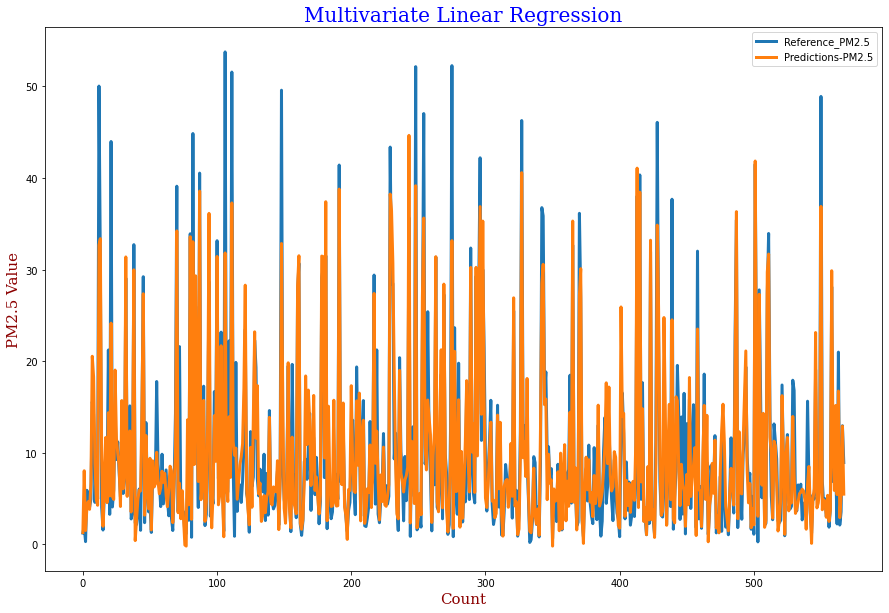

In [28]:
fig, ax = plt.subplots(1, 1, figsize = (15, 10))
#plt.plot(X_test.Hum_34, label="Humidity")
#plt.plot(X_test.Temp_34, label="Temperature")
ax.plot(result_df_mul.Reference_PM25, label="Reference_PM2.5", linewidth=3)
#plt.plot(result_df_mul.Final_PM25, label="PM Nova raw-PM2.5")
ax.plot(result_df_mul.Predictions_PM25, label="Predictions-PM2.5", linewidth=3)


legend = ax.legend(loc='upper center', shadow=True, fontsize='50')
legend.get_frame().set_facecolor('white')

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Multivariate Linear Regression", fontdict = font1)
plt.xlabel("Count", fontdict = font2)
plt.ylabel("PM2.5 Value", fontdict = font2)


plt.legend()
plt.savefig('PM25_MLR_RH_graph.jpg', dpi=100)
plt.show()


In [29]:
x_values = result_df_mul.Reference_PM25
y_values = result_df_mul.Predictions_PM25

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print("R2: ",r_squared)

R2:  0.8531532743946594


In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(x_values, y_values))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(x_values, y_values)))

Mean Absolute Error: 2.594934425590737
Root Mean Squared Error: 3.9665928341772756


In [31]:
#ŷref = b0 + b1*T + b2* PMraw + b3* AH
lm.coef_

array([[ 0.70697629,  0.91548802, -2.16708108]])

In [32]:
lm.intercept_

array([10.5932669])

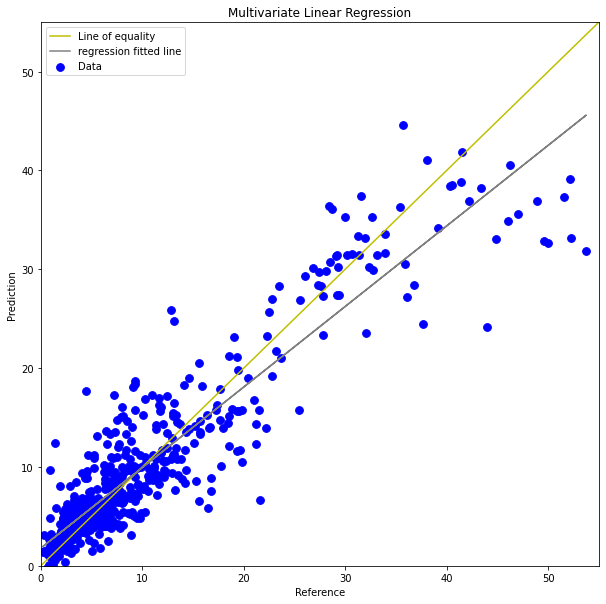

slope: 0.8149663716705732 
intercept: 1.7880534506805237 
r squared: 0.8531532743946596


In [33]:
# Create scatter plot
x = result_df_mul.Reference_PM25
y = result_df_mul.Predictions_PM25

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
fig, ax = plt.subplots(figsize=(10, 10))

m = slope.astype(float)

result_df_mul.plot('Reference_PM25',
                          'Predictions_PM25',
                          kind='scatter',
                          color="Blue",
                          s=60,
                          ax=ax,
                          label="Data")

# Add a diagonal line
ax.set(xlim=[0, 55], ylim=[0, 55])
ax.plot((0, 1), (0, 1), 'y-', transform=ax.transAxes, label="Line of equality")
ax.plot(x, m*x + intercept, 'grey', label='regression fitted line')

ax.set(xlabel="Reference",
       ylabel="Prediction",
       title="Multivariate Linear Regression")

plt.legend()
plt.savefig('PM25_MLR_AH.jpg', dpi=100)
plt.show()
print("slope:", slope,
      "\nintercept:", intercept,
      "\nr squared:", r_value**2)